In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
stock = pd.read_csv("C:/Users/7kingdom/Documents/인공지능개론/src/stock.csv")

samsung_stock = stock[stock['종목명'] == '삼성전자']
print(samsung_stock.head())

            일자     종목코드   종목명       거래량     시가     고가     저가     종가
746   20210601  A005930  삼성전자  14058401  80500  81300  80100  80600
2746  20210602  A005930  삼성전자  16414644  80400  81400  80300  80800
4746  20210603  A005930  삼성전자  29546007  81300  83000  81100  82800
6746  20210604  A005930  삼성전자  18112259  82700  82700  81500  82200
8746  20210607  A005930  삼성전자  16496197  82700  82800  81600  81900


In [3]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [4]:
stock['Name'].value_counts()

3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: Name, Length: 2000, dtype: int64

In [5]:
stock_AJ = stock[stock['Code']=='A005930']

In [6]:
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

In [7]:
stock_AJ

,Date,Open,High,Low,Close,Volume
746,20210601,80500,81300,80100,80600,14058401
2746,20210602,80400,81400,80300,80800,16414644
4746,20210603,81300,83000,81100,82800,29546007
6746,20210604,82700,82700,81500,82200,18112259
8746,20210607,82700,82800,81600,81900,16496197
...,...,...,...,...,...,...
978746,20230523,68500,68700,68100,68400,8561643
980746,20230524,68100,68700,68000,68500,8192896
982746,20230525,69900,70000,68700,68800,14231160
984746,20230526,69800,70400,69500,70300,19549511


In [8]:
stock_AJ['Date'].value_counts()

20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: Date, Length: 494, dtype: int64

In [9]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [10]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
746,0.909677,0.932660,0.937086,0.149371
2746,0.906452,0.936027,0.943709,0.191824
4746,0.935484,0.989899,0.970199,0.428413
6746,0.980645,0.979798,0.983444,0.222410
8746,0.980645,0.983165,0.986755,0.193293
...,...,...,...,...
978746,0.522581,0.508418,0.539735,0.050335
980746,0.509677,0.508418,0.536424,0.043691
982746,0.567742,0.552189,0.559603,0.152484
984746,0.564516,0.565657,0.586093,0.248305


In [11]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.491550,0.485639,0.502098,0.161701
std,0.256053,0.265796,0.260946,0.098114
min,0.000000,0.000000,0.000000,0.000000
25%,0.274194,0.259259,0.281457,0.097524
50%,0.458065,0.449495,0.473510,0.140432
75%,0.709677,0.719697,0.725166,0.200042
max,1.000000,1.000000,1.000000,1.000000


In [12]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [13]:
window_size = 3

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.5096774193531945, 0.5084175084157966, 0.5364238410578264, 0.043691427780116227], [0.5677419354820396, 0.5521885521866929, 0.5596026490047695, 0.1524836043682957], [0.564516129030437, 0.565656565654661, 0.5860927152298474, 0.24830501614325634]] -> [0.6501650164995044]


In [14]:

print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 491 491


In [15]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (343, 3, 4) (343, 1)
테스트 데이터의 크기 : (148, 3, 4) (148, 1)


In [16]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

In [17]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(3, 4)))
model.add(Dropout(0.1))
model.add(SimpleRNN(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 20)             2000      
                                                                 
 dropout (Dropout)           (None, 3, 20)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 2s 5ms/step - loss: 0.3771
Epoch 2/70
12/12 [==============================] - 0s 5ms/step - loss: 0.2881
Epoch 3/70
12/12 [==============================] - 0s 6ms/step - loss: 0.2224
Epoch 4/70
12/12 [==============================] - 0s 5ms/step - loss: 0.1359
Epoch 5/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 6/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 7/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0251
Epoch 8/70
12/12 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 9/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0205
Epoch 10/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 11/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 12/70
12/12 [==============================] - 0s 6ms/step - loss: 0.0149
Epoch 13/70
12/12 [==============================

In [19]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 3ms/step - loss: 0.0022


0.0021726747509092093

In [20]:
y_pred = model.predict(test_X)

5/5 [==============================] - 0s 3ms/step


In [21]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0021726747149029683


5/5 [==============================] - 0s 3ms/step


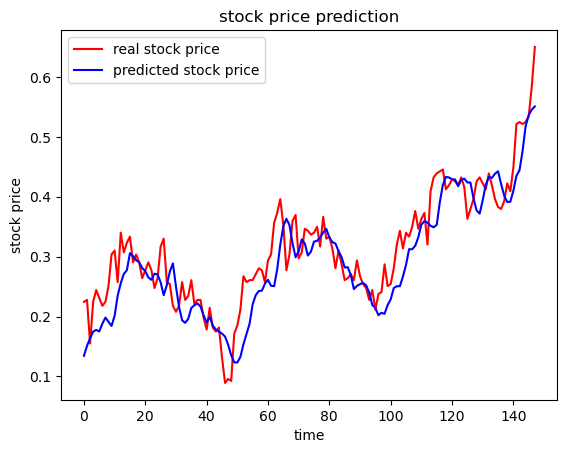

In [22]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()